In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import calendar

In [57]:
pd.options.display.float_format = "{:,.2f}".format
plt.style.use('seaborn-dark')
muesli_df = pd.read_csv('../EDA-GroupProject/data/Group4_Muesli Project raw data - Orders.csv')
muesli_df.head()

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15


In [58]:
#Load the remaining Dataframes
cam_df = pd.read_csv('data/Campaign Data.csv')
pro_df = pd.read_csv('data/Order Process Data.csv')
int_df = pd.read_csv('data/Intern Data Study.csv')

In [59]:
# remove capitalization and white-spaces
muesli_df.rename(columns=lambda x : x.lower(), inplace=True)
muesli_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
cam_df.rename(columns=lambda x : x.lower(), inplace=True)
cam_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
pro_df.rename(columns=lambda x : x.lower(), inplace=True)
pro_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
int_df.rename(columns=lambda x : x.lower(), inplace=True)
int_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

In [60]:
# display results of lowercase and white-space changes
display(muesli_df.columns)
display(cam_df.columns)
display(pro_df.columns)
display(int_df.columns)

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

Index(['order_id', 'arrival_scan_date', 'customer_name'], dtype='object')

Index(['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [61]:
# Drop/clean some columns
muesli_df.drop(['postal_code', 'origin_channel', 'sales', 'quantity', 'discount', 'profit'], axis=1, inplace=True)


In [62]:
# Drop/clean duplicate columns
cam_df.drop('customer_name', axis=1, inplace=True)


In [63]:
# Drop/clean duplicate columns
pro_df.drop(['row_id', 'order_date', 'ship_mode'], axis=1, inplace=True)

In [64]:
# check results
display(muesli_df.columns)
display(cam_df.columns)
display(pro_df.columns)
display(int_df.columns)

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'country/region', 'city', 'state', 'region',
       'category', 'sub-category', 'product_id'],
      dtype='object')

Index(['order_id', 'arrival_scan_date'], dtype='object')

Index(['order_id', 'on_truck_scan_date'], dtype='object')

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [65]:
# remove the duplicates in the sheets
cam_df = cam_df.drop_duplicates()


In [66]:
# remove the duplicates in the sheets
pro_df = pro_df.drop_duplicates()
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 5898
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            3003 non-null   object
 1   on_truck_scan_date  3003 non-null   object
dtypes: object(2)
memory usage: 70.4+ KB


In [67]:
# remove the duplicates in the sheets
int_df = int_df.drop_duplicates()

In [68]:
# merge from left to right
muesli_process_df = muesli_df.merge(pro_df, how='left', on='order_id')
muesli_process_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,23/01/2019
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,13/03/2019
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,26/06/2019
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,19/06/2019
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaN


In [69]:
muesli_cp_df = muesli_process_df.merge(cam_df, how='left', on='order_id')
muesli_cp_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,23/01/2019,NaN
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,13/03/2019,NaN
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,26/06/2019,NaN
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,19/06/2019,NaN
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaN,NaN


In [70]:
muesli2_df = muesli_cp_df.merge(int_df, how='left', on='order_id')
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,23/01/2019,NaN,NaN,NaN
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,13/03/2019,NaN,NaN,NaN
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,26/06/2019,NaN,NaN,NaN
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,19/06/2019,NaN,NaN,NaN
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaN,NaN,NaN,NaN


In [71]:
# check results
muesli2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               9996 non-null   int64 
 1   order_id            9996 non-null   object
 2   order_date          9996 non-null   object
 3   ship_mode           9996 non-null   object
 4   customer_id         9996 non-null   object
 5   customer_name       9996 non-null   object
 6   country/region      9996 non-null   object
 7   city                9996 non-null   object
 8   state               9996 non-null   object
 9   region              9996 non-null   object
 10  category            9996 non-null   object
 11  sub-category        9996 non-null   object
 12  product_id          9996 non-null   object
 13  on_truck_scan_date  5901 non-null   object
 14  arrival_scan_date   668 non-null    object
 15  ready_to_ship_date  418 non-null    object
 16  pickup_date         418 

In [72]:
# # change all date formats to year-month-day
muesli2_df['order_date'] = pd.to_datetime(muesli2_df['order_date'], format='%d/%m/%Y')


In [73]:
# change all date formats to year-month-day
muesli2_df['arrival_scan_date'] = pd.to_datetime(muesli2_df['arrival_scan_date'], format='%d/%m/%Y')


In [74]:
# change all date formats to year-month-day
muesli2_df['on_truck_scan_date'] = pd.to_datetime(muesli2_df['on_truck_scan_date'], format='%d/%m/%Y')


In [75]:
# change all date formats to year-month-day
muesli2_df['ready_to_ship_date'] = pd.to_datetime(muesli2_df['ready_to_ship_date'], format='%d/%m/%Y')


In [76]:
# change all date formats to year-month-day
muesli2_df['pickup_date'] = pd.to_datetime(muesli2_df['pickup_date'], format='%d/%m/%Y')
muesli2_df['on_truck_scan_date'] = pd.to_datetime(muesli2_df['on_truck_scan_date'], format='%d/%m/%Y')

In [77]:
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,2019-01-23,NaT,NaT,NaT
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,2019-03-13,NaT,NaT,NaT
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-26,NaT,NaT,NaT
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-19,NaT,NaT,NaT
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaT,NaT,NaT,NaT


In [78]:
# Create new column called 'ship_to_pickup_days' to check the time between ready date and the ship pick-up date in the intern study data
muesli2_df['order_to_on_truck_days'] = (muesli2_df['on_truck_scan_date']-muesli2_df['order_date']).dt.days
# Check results
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date,order_to_on_truck_days
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,2019-01-23,NaT,NaT,NaT,7.00
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,2019-03-13,NaT,NaT,NaT,2.00
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-26,NaT,NaT,NaT,6.00
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-19,NaT,NaT,NaT,2.00
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaT,NaT,NaT,NaT,NaN


In [79]:
# Create 'order_month' column from 'order_date'.dt.month column
muesli2_df['order_month'] = muesli2_df['order_date'].dt.month
muesli2_df['order_month'] = muesli2_df['order_month'].apply(lambda x: calendar.month_abbr[x])
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date,order_to_on_truck_days,order_month
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,2019-01-23,NaT,NaT,NaT,7.00,Jan
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,2019-03-13,NaT,NaT,NaT,2.00,Mar
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-26,NaT,NaT,NaT,6.00,Jun
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-19,NaT,NaT,NaT,2.00,Jun
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaT,NaT,NaT,NaT,NaN,Nov


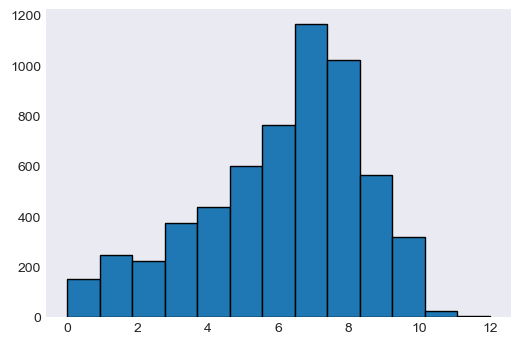

In [80]:
plt.figure(figsize=(6, 4))

# create a histogram for 'order_to_on_truck_days'
plt.hist(muesli2_df['order_to_on_truck_days'], bins = 13, edgecolor = 'k');

array([[<AxesSubplot:title={'center':'First Class'}>,
        <AxesSubplot:title={'center':'Second Class'}>],
       [<AxesSubplot:title={'center':'Standard Class'}>, <AxesSubplot:>]],
      dtype=object)

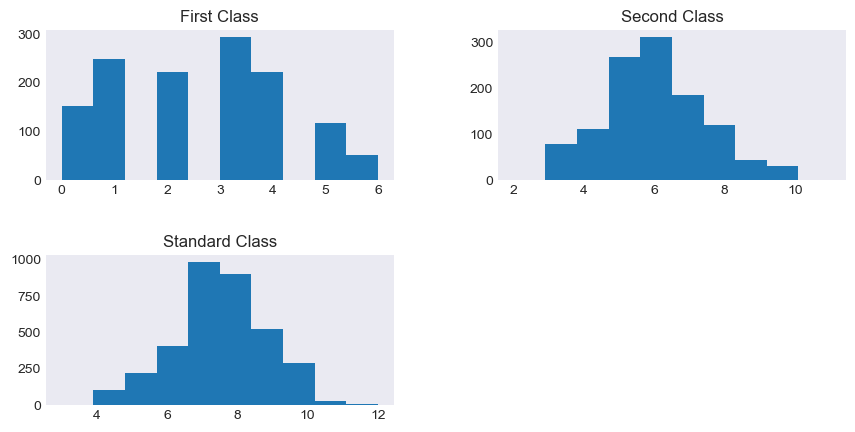

In [81]:
muesli2_df['order_to_on_truck_days'].hist(by=muesli2_df['ship_mode'], figsize=(10, 5), rot=0)